In [94]:
# Read data from the text file
data <- read.table("m-abt3dx.txt", header = TRUE)

# Print the first few rows of the data
print(head(data))

      date       abt    vwretd    ewretd    sprtrn
1 19720131  0.039147  0.028383  0.103892  0.018121
2 19720229  0.076779  0.031349  0.041809  0.025303
3 19720330 -0.029565  0.008722 -0.000951  0.005912
4 19720428  0.021864  0.005505  0.001231  0.004384
5 19720531  0.054577  0.016375 -0.018121  0.017275
6 19720630  0.038397 -0.020896 -0.033775 -0.021821


In [95]:
# Install the fBasics package if not already installed
if (!requireNamespace("fBasics", quietly = TRUE)) {
  install.packages("fBasics")
}

# Load the fBasics package
library(fBasics)

# Compute basic statistics for the simple returns of the stocks
stats <- basicStats(data[, c('abt', 'vwretd', 'ewretd', 'sprtrn')])

excess_kurtosis <- c(fBasics::kurtosis(data$abt, method = "excess"), fBasics::kurtosis(data$vwretd, method = "excess"), fBasics::kurtosis(data$ewretd, method = "excess"), fBasics::kurtosis(data$sprtrn, method = "excess") )

stats[c("Excess Kurtosis"),] <- rbind(excess_kurtosis)

print(stats[c("Mean", "Stdev", "Skewness", "Excess Kurtosis", "Minimum", "Maximum"),])

                      abt    vwretd    ewretd    sprtrn
Mean             0.014073  0.009020  0.011583  0.006386
Stdev            0.064795  0.046341  0.057299  0.044788
Skewness         0.097058 -0.555341 -0.200025 -0.444303
Excess Kurtosis  2.469971  2.073657  3.288104  1.889777
Minimum         -0.234146 -0.225363 -0.272248 -0.217630
Maximum          0.382326  0.165585  0.299260  0.163047


In [96]:
log_returns <- data.frame(lapply(data[, c('abt', 'vwretd', 'ewretd', 'sprtrn')], function(x) log(1+x)))

# Compute basic statistics for the log returns of the stocks
log_stats <- basicStats(log_returns)

excess_kurtosis <- c(fBasics::kurtosis(log_returns$abt, method = "excess"), fBasics::kurtosis(log_returns$vwretd, method = "excess"), fBasics::kurtosis(log_returns$ewretd, method = "excess"), fBasics::kurtosis(log_returns$sprtrn, method = "excess") )

log_stats[c("Excess Kurtosis"),] <- rbind(excess_kurtosis)
# Print the statistics
print(log_stats[c("Mean", "Stdev", "Skewness", "Excess Kurtosis", "Minimum", "Maximum"),])

                      abt    vwretd    ewretd    sprtrn
Mean             0.011924  0.007903  0.009887  0.005360
Stdev            0.064287  0.046745  0.057491  0.045145
Skewness        -0.297125 -0.839542 -0.662276 -0.711215
Excess Kurtosis  2.005416  3.003331  3.976081  2.659018
Minimum         -0.266764 -0.255361 -0.317795 -0.245428
Maximum          0.323768  0.153223  0.261795  0.151043


In [97]:
# Perform t-test to test the null hypothesis that the mean log return of ABT is equal to zero
t_test_result <- t.test(log_returns$abt, mu = 0, conf.level = 0.99)

# Print the t-test result
print(t_test_result)


	One Sample t-test

data:  log_returns$abt
t = 4.1143, df = 491, p-value = 4.555e-05
alternative hypothesis: true mean is not equal to 0
99 percent confidence interval:
 0.004429679 0.019418891
sample estimates:
 mean of x 
0.01192429 



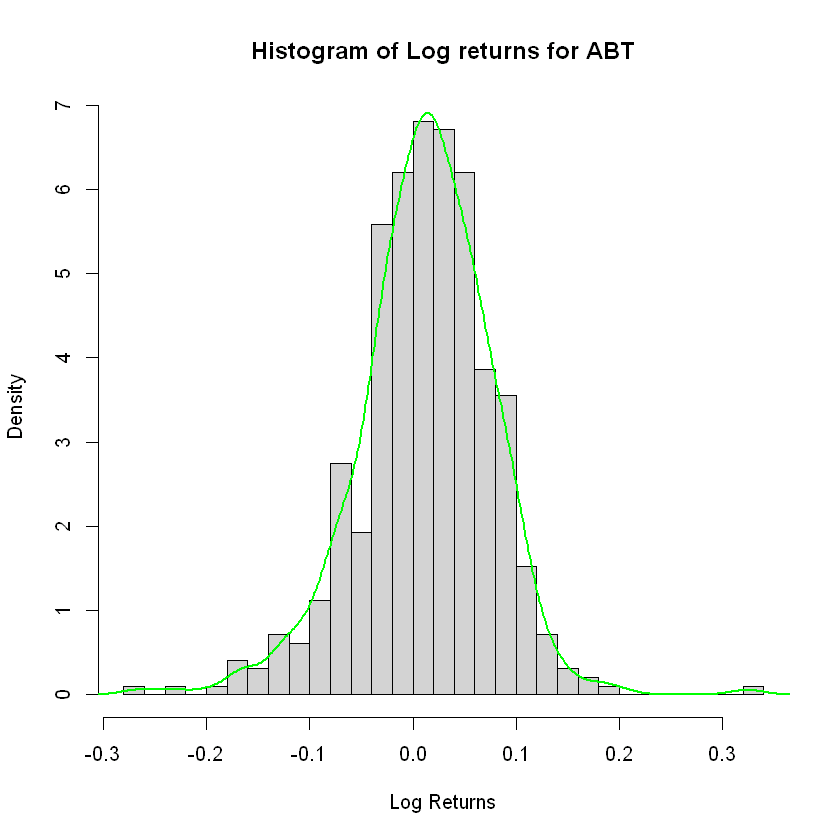

In [98]:
# Plot the histogram of log returns for ABT with breaks 40
hist(log_returns$abt, main = "Histogram of Log returns for ABT", breaks = 40, probability = TRUE, xlab = "Log Returns")
lines(density(log_returns$abt), col = "green", lwd = 2)